In [1]:
%cd ..
import jax.numpy as jnp
import matplotlib.pyplot as plt
from stencilnet.finite_volume import generate_rectilinear_mesh, u0, dynamics
import stencilnet.ode as ode

%cd examples/

/u/jp7427/Desktop/StencilNet
/u/jp7427/Desktop/StencilNet/examples


/u/jp7427/miniconda3/envs/ml/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
# domain
n = 64
x, y = generate_rectilinear_mesh((0, 1), (0, 1), n)
T = 1

# problem specs
u_init = u0(x, y, type="square")
v = (2, 1)

# solver config
p = 3
cfl = 0.8
h = (1 / n, 1 / n)
dt = cfl / (v[0] / h[0] + v[1] / h[1])
n_steps = int(jnp.ceil(T // dt))

I0000 00:00:1706121014.899734  124363 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [3]:
# execute solver
U = ode.integrator(
    f=lambda u: dynamics(u, v=v, p=p, h=h),
    step=ode.rk4_step,
    u_init=u_init,
    n_steps=n_steps,
    T=T,
)

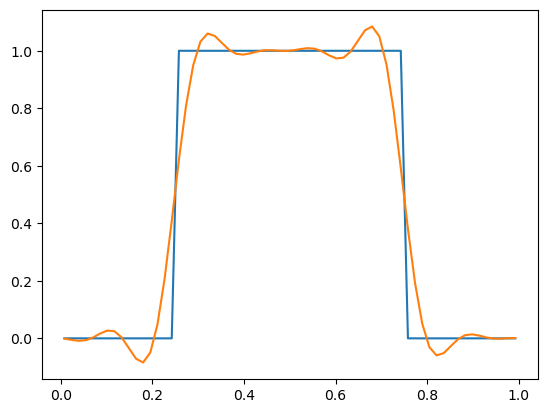

In [4]:
# plot
plt.plot(x[0], U[0, int(n / 2), :])
plt.plot(x[0], U[-1, int(n / 2), :])
plt.show()